In [38]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [39]:
df = pd.read_csv('final rainfallcsv - Copy.csv')  
df.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,cloud,temp,raintoday,raintom
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,NaN,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,NaN,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,2.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,NaN,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,8.0,29.7,No,No


In [40]:
inputs=df


In [41]:
from sklearn.preprocessing import LabelEncoder
le_location=LabelEncoder()
le_mintemp=LabelEncoder()
le_maxtemp=LabelEncoder()
le_rainfall=LabelEncoder()
le_evaporation=LabelEncoder()
le_sunshine=LabelEncoder()
le_winddir=LabelEncoder()
le_windspeed=LabelEncoder()
le_humidity=LabelEncoder()
le_pressure=LabelEncoder()
le_cloud=LabelEncoder()
le_temp=LabelEncoder()
le_raintoday=LabelEncoder()
le_raintom=LabelEncoder()

In [42]:
inputs['location_n']=le_location.fit_transform(inputs['location'])
inputs['maxtemp_n']=le_maxtemp.fit_transform(inputs['maxtemp'])
inputs['rainfall_n']=le_rainfall.fit_transform(inputs['rainfall'])
inputs['evaporation_n']=le_evaporation.fit_transform(inputs['evaporation'])
inputs['sunshine_n']=le_sunshine.fit_transform(inputs['sunshine'])
inputs['winddir_n']=le_winddir.fit_transform(inputs['winddir'].astype(str))
inputs['windspeed_n']=le_windspeed.fit_transform(inputs['windspeed'])
inputs['humidity_n']=le_humidity.fit_transform(inputs['humidity'])
inputs['pressure_n']=le_pressure.fit_transform(inputs['pressure'])
inputs['cloud']=le_cloud.fit_transform(inputs['cloud'])
inputs['temp_n']=le_temp.fit_transform(inputs['temp'])
inputs['raintoday_n']=le_raintoday.fit_transform(inputs['raintoday'].astype(str))
inputs['raintom_n']=le_raintom.fit_transform(inputs['raintom'])

In [43]:
inputs

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0
12710,Walpole,7.9,21.6,0.0,NaN,NaN,N,17.0,37.0,1007.9,...,0,1729,2471,3,9,36,151,143,0,1
12711,Walpole,12.1,15.9,6.8,NaN,NaN,WSW,6.0,78.0,1001.9,...,55,5931,7813,15,3,77,91,88,1,1


In [44]:
inputs_n = inputs.drop(['location','mintemp','maxtemp','rainfall','evaporation','sunshine','winddir','windspeed','humidity','pressure','cloud','temp','raintoday','raintom'],axis='columns')

In [45]:
inputs_n

,location_n,maxtemp_n,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,2,143,6,1043,1732,14,13,21,143,151,0,0
1,2,165,0,4923,5999,15,12,24,150,176,0,0
2,2,171,0,4924,6000,15,14,29,159,165,0,0
3,2,194,0,4925,6001,0,5,15,200,198,0,0
4,2,237,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12708,19,64,0,1731,2473,5,4,64,343,80,0,0
12709,19,88,0,1730,2472,5,10,44,249,105,0,0
12710,19,130,0,1729,2471,3,9,36,151,143,0,1
12711,19,73,55,5931,7813,15,3,77,91,88,1,1


In [46]:
inputs_n1=inputs_n.drop('raintom_n',axis='columns')

In [47]:
inputs_n1

,location_n,maxtemp_n,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n
0,2,143,6,1043,1732,14,13,21,143,151,0
1,2,165,0,4923,5999,15,12,24,150,176,0
2,2,171,0,4924,6000,15,14,29,159,165,0
3,2,194,0,4925,6001,0,5,15,200,198,0
4,2,237,10,4926,6002,7,11,32,132,230,0
...,...,...,...,...,...,...,...,...,...,...,...
12708,19,64,0,1731,2473,5,4,64,343,80,0
12709,19,88,0,1730,2472,5,10,44,249,105,0
12710,19,130,0,1729,2471,3,9,36,151,143,0
12711,19,73,55,5931,7813,15,3,77,91,88,1


In [48]:
target=inputs_n['raintom_n']

In [49]:
target

0        0
1        0
2        0
3        0
4        0
        ..
12708    0
12709    0
12710    1
12711    1
12712    1
Name: raintom_n, Length: 12713, dtype: int32

In [50]:
df=pd.DataFrame(inputs_n1)
y=target

In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:

import seaborn as sns

<Figure size 432x288 with 0 Axes>

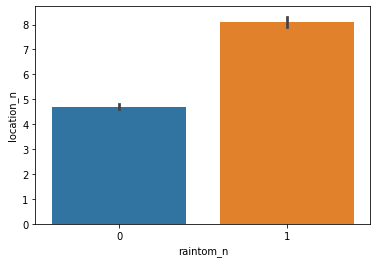

<Figure size 432x288 with 0 Axes>

In [53]:
sns.barplot(y="location_n",x="raintom_n",data=inputs_n)
plt.figure()

<Figure size 432x288 with 0 Axes>

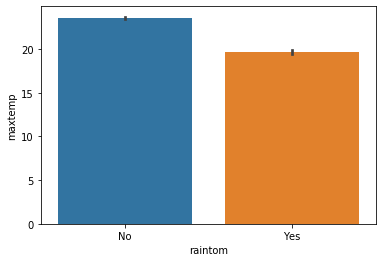

<Figure size 432x288 with 0 Axes>

In [54]:
sns.barplot(y="maxtemp",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

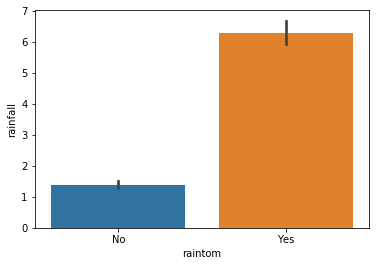

<Figure size 432x288 with 0 Axes>

In [55]:
sns.barplot(y="rainfall",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

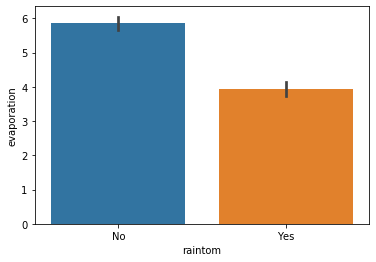

<Figure size 432x288 with 0 Axes>

In [56]:
sns.barplot(y="evaporation",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

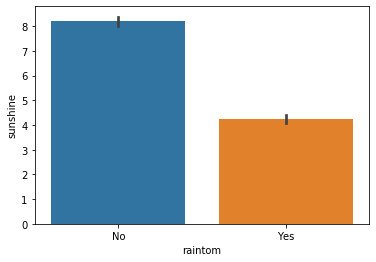

<Figure size 432x288 with 0 Axes>

In [57]:
sns.barplot(y="sunshine",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

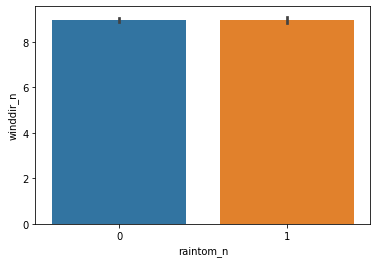

<Figure size 432x288 with 0 Axes>

In [58]:
sns.barplot(y="winddir_n",x="raintom_n",data=inputs_n)
plt.figure()

<Figure size 432x288 with 0 Axes>

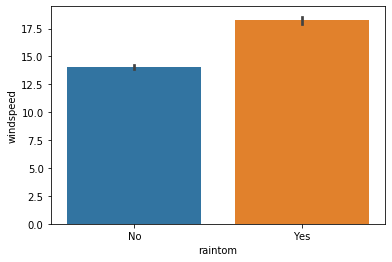

<Figure size 432x288 with 0 Axes>

In [59]:
sns.barplot(y="windspeed",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

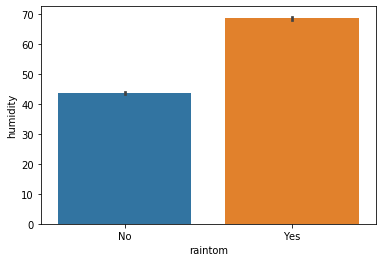

<Figure size 432x288 with 0 Axes>

In [60]:
sns.barplot(y="humidity",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

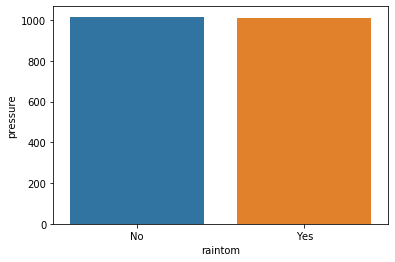

<Figure size 432x288 with 0 Axes>

In [61]:
sns.barplot(y="pressure",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

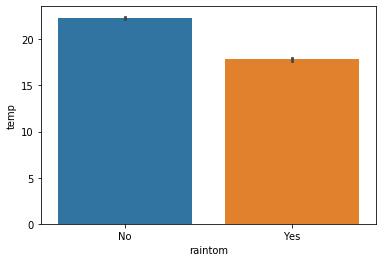

<Figure size 432x288 with 0 Axes>

In [62]:
sns.barplot(y="temp",x="raintom",data=inputs)
plt.figure()

<Figure size 432x288 with 0 Axes>

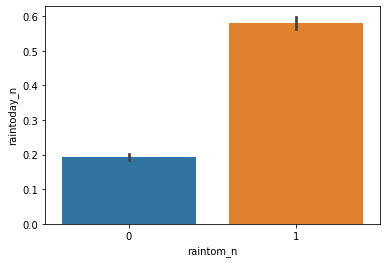

<Figure size 432x288 with 0 Axes>

In [63]:
sns.barplot(y="raintoday_n",x="raintom_n",data=inputs_n)
plt.figure()

In [66]:
inputs_n1=inputs_n.drop(['winddir_n','pressure_n','raintom_n'],axis='columns')

In [67]:
inputs_n1

,location_n,maxtemp_n,rainfall_n,evaporation_n,sunshine_n,windspeed_n,humidity_n,temp_n,raintoday_n
0,2,143,6,1043,1732,13,21,151,0
1,2,165,0,4923,5999,12,24,176,0
2,2,171,0,4924,6000,14,29,165,0
3,2,194,0,4925,6001,5,15,198,0
4,2,237,10,4926,6002,11,32,230,0
...,...,...,...,...,...,...,...,...,...
12708,19,64,0,1731,2473,4,64,80,0
12709,19,88,0,1730,2472,10,44,105,0
12710,19,130,0,1729,2471,9,36,143,0
12711,19,73,55,5931,7813,3,77,88,1


{'whiskers': [<matplotlib.lines.Line2D at 0x39664e8d88>,
 'caps': [<matplotlib.lines.Line2D at 0x39664432c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x3966474d88>],
 'medians': [<matplotlib.lines.Line2D at 0x3966425d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x3966421848>],
 'means': []}

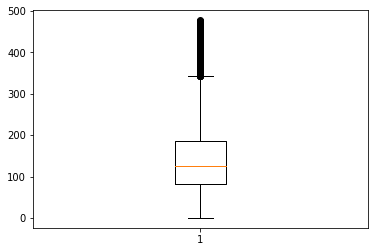

In [68]:
import numpy as np
plt.boxplot(inputs_n1.maxtemp_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x3966474d48>,
 'caps': [<matplotlib.lines.Line2D at 0x39663a3308>,
 'boxes': [<matplotlib.lines.Line2D at 0x3966398bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x396639e108>],
 'fliers': [<matplotlib.lines.Line2D at 0x396639e388>],
 'means': []}

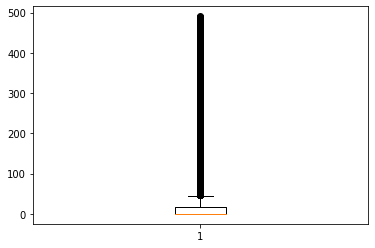

In [69]:
import numpy as np
plt.boxplot(inputs_n1.rainfall_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x3966283cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x3966312948>,
 'boxes': [<matplotlib.lines.Line2D at 0x3966324cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x3966310348>],
 'fliers': [<matplotlib.lines.Line2D at 0x3966311808>],
 'means': []}

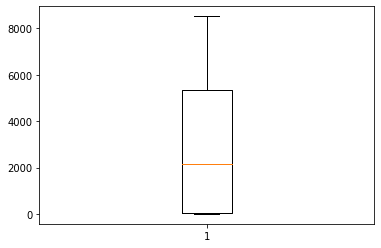

In [70]:
import numpy as np
plt.boxplot(inputs_n1.evaporation_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x3966291fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x3966292108>,
 'boxes': [<matplotlib.lines.Line2D at 0x396628bf08>],
 'medians': [<matplotlib.lines.Line2D at 0x3966274308>],
 'fliers': [<matplotlib.lines.Line2D at 0x3966269a48>],
 'means': []}

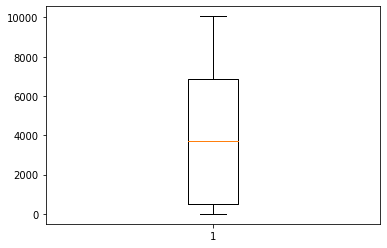

In [71]:
import numpy as np
plt.boxplot(inputs_n1.sunshine_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x3966016908>,
 'caps': [<matplotlib.lines.Line2D at 0x39661d97c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x3966204588>],
 'medians': [<matplotlib.lines.Line2D at 0x39661d7e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x396549a288>],
 'means': []}

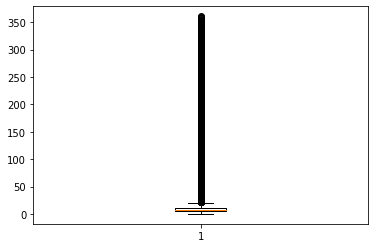

In [72]:
import numpy as np
plt.boxplot(inputs_n1.windspeed_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x39661d0a48>,
 'caps': [<matplotlib.lines.Line2D at 0x396608b448>,
 'boxes': [<matplotlib.lines.Line2D at 0x3966134b88>],
 'medians': [<matplotlib.lines.Line2D at 0x3965c39ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x3966085888>],
 'means': []}

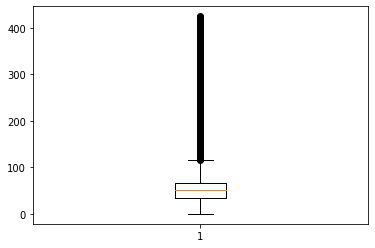

In [73]:
import numpy as np
plt.boxplot(inputs_n1.humidity_n)

{'whiskers': [<matplotlib.lines.Line2D at 0x3964bfda88>,
 'caps': [<matplotlib.lines.Line2D at 0x39643a4b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x39643c06c8>],
 'medians': [<matplotlib.lines.Line2D at 0x39641f37c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x39642f9b48>],
 'means': []}

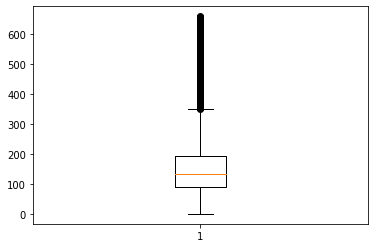

In [74]:
import numpy as np
plt.boxplot(inputs_n1.temp_n)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [80]:
inputs['humidity'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      1.0
0.1     23.0
0.2     32.0
0.3     39.8
0.4     46.0
0.5     51.0
0.6     57.0
0.7     63.0
0.8     70.0
0.9     82.0
1.0    100.0
Name: humidity, dtype: float64

In [81]:
df=pd.DataFrame(inputs)
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['humidity'] >= Q1 - 1.5 * IQR) & (df['humidity'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0
12710,Walpole,7.9,21.6,0.0,NaN,NaN,N,17.0,37.0,1007.9,...,0,1729,2471,3,9,36,151,143,0,1
12711,Walpole,12.1,15.9,6.8,NaN,NaN,WSW,6.0,78.0,1001.9,...,55,5931,7813,15,3,77,91,88,1,1


In [82]:
inputs['maxtemp'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     8.2
0.1    14.3
0.2    16.1
0.3    17.6
0.4    19.2
0.5    21.0
0.6    23.2
0.7    25.7
0.8    28.6
0.9    32.1
1.0    46.0
Name: maxtemp, dtype: float64

In [83]:
df=pd.DataFrame(inputs)
Q1 = df['maxtemp'].quantile(0.25)
Q3 = df['maxtemp'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['maxtemp'] >= Q1 - 1.5 * IQR) & (df['maxtemp'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0
12710,Walpole,7.9,21.6,0.0,NaN,NaN,N,17.0,37.0,1007.9,...,0,1729,2471,3,9,36,151,143,0,1
12711,Walpole,12.1,15.9,6.8,NaN,NaN,WSW,6.0,78.0,1001.9,...,55,5931,7813,15,3,77,91,88,1,1


In [84]:
inputs['rainfall'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
0.6      0.2
0.7      1.0
0.8      3.2
0.9      8.8
1.0    206.8
Name: rainfall, dtype: float64

In [85]:
df=pd.DataFrame(inputs)
Q1 = df['rainfall'].quantile(0.25)
Q3 = df['rainfall'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['rainfall'] >= Q1 - 1.5 * IQR) & (df['rainfall'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,Walpole,7.0,16.4,0.2,NaN,NaN,WSW,22.0,63.0,1021.3,...,2,1733,2475,15,12,62,285,88,0,1
12707,Walpole,10.9,13.9,3.6,NaN,NaN,SSE,13.0,61.0,1028.1,...,30,1732,2474,10,7,60,353,60,1,0
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0


In [86]:
inputs['windspeed'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     0.0
0.1     6.0
0.2     9.0
0.3    11.0
0.4    13.0
0.5    15.0
0.6    17.0
0.7    19.0
0.8    22.0
0.9    28.0
1.0    83.0
Name: windspeed, dtype: float64

In [87]:
df=pd.DataFrame(inputs)
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['windspeed'] >= Q1 - 1.5 * IQR) & (df['windspeed'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0
12710,Walpole,7.9,21.6,0.0,NaN,NaN,N,17.0,37.0,1007.9,...,0,1729,2471,3,9,36,151,143,0,1
12711,Walpole,12.1,15.9,6.8,NaN,NaN,WSW,6.0,78.0,1001.9,...,55,5931,7813,15,3,77,91,88,1,1


In [88]:
inputs['temp'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     5.3
0.1    13.0
0.2    14.8
0.3    16.3
0.4    17.9
0.5    19.6
0.6    21.8
0.7    24.2
0.8    27.0
0.9    30.5
1.0    44.8
Name: temp, dtype: float64

In [89]:
df=pd.DataFrame(inputs)
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['temp'] >= Q1 - 1.5 * IQR) & (df['temp'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,winddir,windspeed,humidity,pressure,...,rainfall_n,evaporation_n,sunshine_n,winddir_n,windspeed_n,humidity_n,pressure_n,temp_n,raintoday_n,raintom_n
0,Albury,13.4,22.9,0.6,NaN,NaN,WNW,24.0,22.0,1007.1,...,6,1043,1732,14,13,21,143,151,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WSW,22.0,25.0,1007.8,...,0,4923,5999,15,12,24,150,176,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,26.0,30.0,1008.7,...,0,4924,6000,15,14,29,159,165,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,E,9.0,16.0,1012.8,...,0,4925,6001,0,5,15,200,198,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,NW,20.0,33.0,1006.0,...,10,4926,6002,7,11,32,132,230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12708,Walpole,4.9,15.0,0.0,NaN,NaN,NNE,7.0,65.0,1027.1,...,0,1731,2473,5,4,64,343,80,0,0
12709,Walpole,6.2,17.4,0.0,NaN,NaN,NNE,19.0,45.0,1017.7,...,0,1730,2472,5,10,44,249,105,0,0
12710,Walpole,7.9,21.6,0.0,NaN,NaN,N,17.0,37.0,1007.9,...,0,1729,2471,3,9,36,151,143,0,1
12711,Walpole,12.1,15.9,6.8,NaN,NaN,WSW,6.0,78.0,1001.9,...,55,5931,7813,15,3,77,91,88,1,1


In [90]:
from sklearn import tree
var_train, var_test, res_train, res_test = train_test_split(inputs_n1, target, test_size = 0.3)

In [91]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(var_train, res_train)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

res_pred = decision_tree.predict(var_test)
score = accuracy_score(res_test, res_pred)

In [93]:
score

0.7616675406397483